Dataset loaded: (9120, 5625) Labels: (9120,)


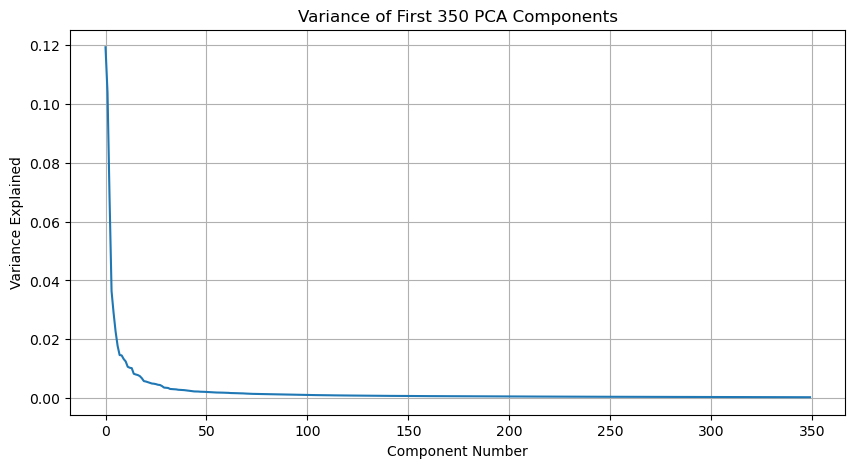

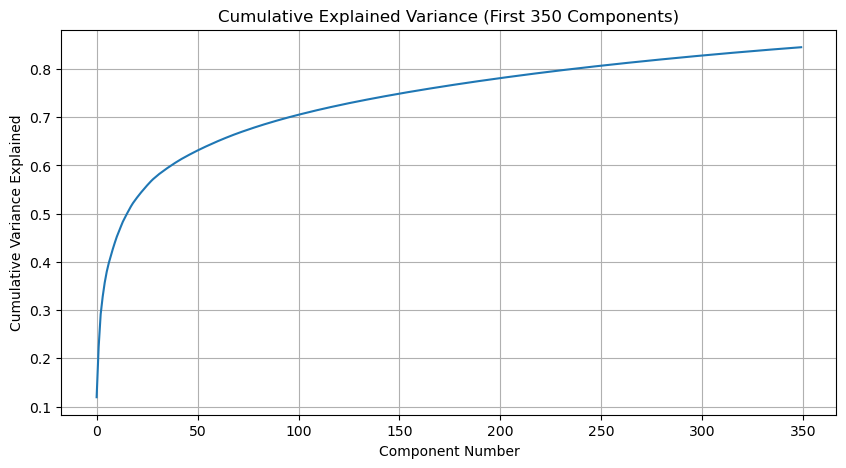

PCA plots generated!


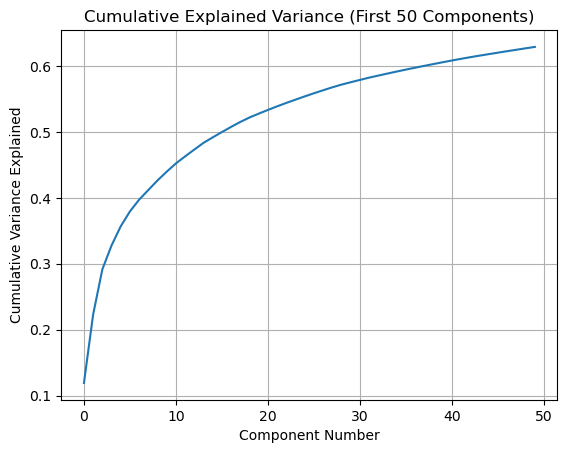

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 29 17:35:59 2025

@author: nayana
"""
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -----------------------------
# 1. SET YOUR DATASET FOLDER
# -----------------------------
folder = "/Users/nayana/Downloads/data"   # change only if needed

X = []
y = []

# -----------------------------
# 2. LOAD THE DATA
# -----------------------------
for act in sorted(os.listdir(folder)):        # a01, a02, ... a19
    act_path = os.path.join(folder, act)

    if not os.path.isdir(act_path):
        continue

    label = int(act[1:])                      # convert "a01" → 1

    for person in sorted(os.listdir(act_path)):   # p1, p2, ... p8
        person_path = os.path.join(act_path, person)

        for file in sorted(os.listdir(person_path)):   # s01.txt, ...
            file_path = os.path.join(person_path, file)

            # Load 125×45 matrix (comma-separated)
            data = np.genfromtxt(file_path, delimiter=',')

            # Flatten into 1×5625 vector
            X.append(data.flatten())
            y.append(label)

X = np.array(X)
y = np.array(y)

print("Dataset loaded:", X.shape, "Labels:", y.shape)

# -----------------------------
# 3. STANDARDIZE DATA
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 4. APPLY PCA
# -----------------------------
pca = PCA(n_components=350)
pca.fit(X_scaled)

variance = pca.explained_variance_ratio_
cumulative = np.cumsum(variance)

# -----------------------------
# 5. PLOT: First 350 Components
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(variance[:350])
plt.title("Variance of First 350 PCA Components")
plt.xlabel("Component Number")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()

# -----------------------------
# 6. PLOT: Cumulative Variance
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(cumulative[:350])
plt.title("Cumulative Explained Variance (First 350 Components)")
plt.xlabel("Component Number")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()

print("PCA plots generated!")
pca_50 = PCA(n_components=50).fit(X_scaled)
cumulative_50 = np.cumsum(pca_50.explained_variance_ratio_)

plt.plot(cumulative_50)
plt.title("Cumulative Explained Variance (First 50 Components)")
plt.xlabel("Component Number")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()
